In [1]:
# Import standard libraries. 

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

In [2]:
# Load dataset
df = pd.read_csv('./who_LifeExpectancyData.csv')

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
df.shape

(2938, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
# Description and context of the Life Expectancy (WHO) dataset can be found here.
  ##  https://www.kaggle.com/kumarajarshi/life-expectancy-who/discussion/161876

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
rnm_dict = {}
for i in df.columns:
    rnm_dict[i] = i.strip().lower().replace(' ','_').replace('-','_').strip('_')

rnm_dict[' thinness  1-19 years']  = 'thinness_1_19_years' 
rnm_dict['hiv/aids'] = 'hiv_aids'


rnm_dict

{'country': 'country',
 'year': 'year',
 'status': 'status',
 'life_expectancy': 'life_expectancy',
 'adult_mortality': 'adult_mortality',
 'infant_deaths': 'infant_deaths',
 'alcohol': 'alcohol',
 'percentage_expenditure': 'percentage_expenditure',
 'hepatitis_b': 'hepatitis_b',
 'measles': 'measles',
 'bmi': 'bmi',
 'under_five_deaths': 'under_five_deaths',
 'polio': 'polio',
 'total_expenditure': 'total_expenditure',
 'diphtheria': 'diphtheria',
 'hiv/aids': 'hiv_aids',
 'gdp': 'gdp',
 'population': 'population',
 'thinness_1_19_years': 'thinness_1_19_years',
 'thinness_5_9_years': 'thinness_5_9_years',
 'income_composition_of_resources': 'income_composition_of_resources',
 'schooling': 'schooling',
 ' thinness  1-19 years': 'thinness_1_19_years'}

In [14]:
df.rename(columns = rnm_dict, inplace=True)

In [15]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [16]:
df.country.value_counts()

France              16
Slovakia            16
Uzbekistan          16
Peru                16
Zimbabwe            16
                    ..
Marshall Islands     1
Nauru                1
Dominica             1
Cook Islands         1
Monaco               1
Name: country, Length: 193, dtype: int64

In [17]:
for i in df.country.unique():
    if len(df[df.country == i]) == 1:
        print(i)

Cook Islands
Dominica
Marshall Islands
Monaco
Nauru
Niue
Palau
Saint Kitts and Nevis
San Marino
Tuvalu


In [18]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv_aids                             0
gdp                                448
population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [19]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [206]:
# life expectancy is approximately normally distributed. Impute missing values with mean.
df['life_expectancy'] = df['life_expectancy'].fillna(value=df['life_expectancy'].mean())

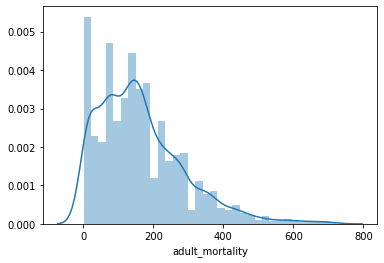

In [209]:
sns.distplot(df.adult_mortality)

In [210]:
df['adult_mortality'] = df['adult_mortality'].fillna(value=df['adult_mortality'].mean())

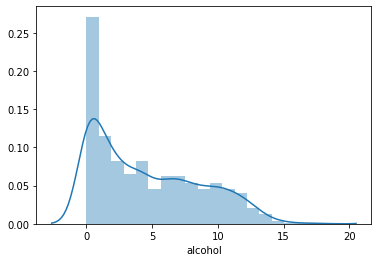

In [207]:
sns.distplot(df.alcohol)

In [208]:
df['alcohol'] = df['alcohol'].fillna(value=df['alcohol'].mode())

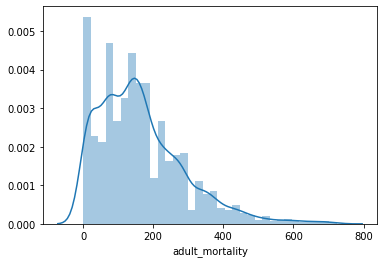

In [166]:
df['adult_mortality']=df['adult_mortality'].fillna(value=df['adult_mortality'].mean())

In [212]:
# Identify percentage of null values in each column
df.isnull().sum()/df.isnull().count()

country                            0.000000
year                               0.000000
status                             0.000000
life_expectancy                    0.000000
adult_mortality                    0.000000
infant_deaths                      0.000000
alcohol                            0.066031
percentage_expenditure             0.000000
hepatitis_b                        0.188223
measles                            0.000000
bmi                                0.011572
under_five_deaths                  0.000000
polio                              0.006467
total_expenditure                  0.076923
diphtheria                         0.006467
hiv/aids                           0.000000
gdp                                0.152485
population                         0.221920
thinness_1_19_years                0.011572
thinness_5_9_years                 0.011572
income_composition_of_resources    0.056841
schooling                          0.055480
dtype: float64

In [220]:
df[df.country == 'Algeria']

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
33,Algeria,2014,Developing,75.4,11.0,21,0.01,54.237318,95.0,0,58.4,24,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
34,Algeria,2013,Developing,75.3,112.0,21,0.53,544.450743,95.0,25,57.2,24,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
35,Algeria,2012,Developing,75.1,113.0,21,0.66,555.926083,95.0,18,56.1,24,95.0,6.14,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
36,Algeria,2011,Developing,74.9,116.0,21,0.56,509.002041,95.0,112,55.0,24,95.0,5.29,95.0,0.1,5432.252300,36819558.0,5.9,5.8,0.724,14.0
37,Algeria,2010,Developing,74.7,119.0,21,0.45,430.717586,95.0,103,53.9,24,95.0,5.12,95.0,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6
38,Algeria,2009,Developing,74.4,123.0,20,0.50,352.063642,94.0,107,52.8,23,94.0,5.36,95.0,0.1,3868.831230,3546576.0,6.0,5.9,0.705,13.1
39,Algeria,2008,Developing,74.1,126.0,20,0.46,43.087173,91.0,217,51.8,23,92.0,4.20,93.0,0.1,495.254866,3486715.0,6.0,5.9,0.697,12.6
40,Algeria,2007,Developing,73.8,129.0,20,0.44,320.323924,9.0,0,5.8,23,95.0,3.82,95.0,0.1,3935.183343,34376.0,6.0,5.9,0.690,12.3
41,Algeria,2006,Developing,73.4,132.0,20,0.36,270.240196,8.0,944,49.8,23,95.0,3.36,95.0,0.1,3464.617900,33777915.0,6.1,6.0,0.686,12.3


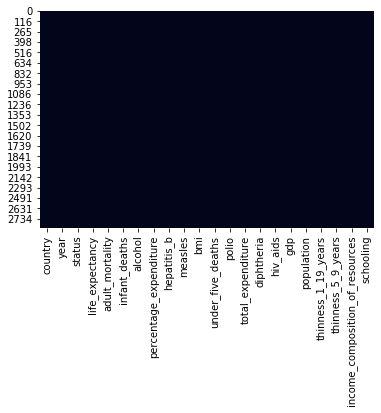

In [250]:
sns.heatmap(df.isnull(), cbar=False)

In [184]:
country_list = df.country.unique()
fill_list = ['life_expectancy','adult_mortality','alcohol',
             'hepatitis_b','bmi','polio','total_expenditure','diphtheria','gdp',
             'population','thinness_1_19_years','thinness_5_9_years',
             'income_composition_of_resources','schooling']

In [226]:
# Treat null values using interpolation.

for country in country_list:
    df.loc[df['country'] == country,fill_list] = df.loc[df['country'] == country,fill_list].interpolate()
    

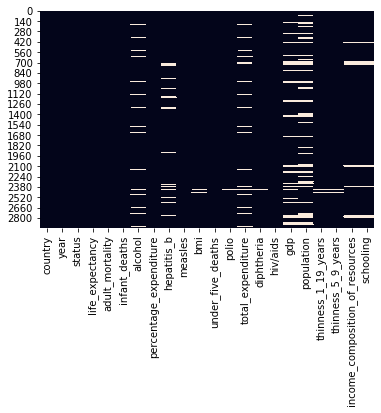

In [227]:
sns.heatmap(df.isnull(), cbar=False)

In [228]:
df.dropna(inplace=True)

In [229]:
df.isnull().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

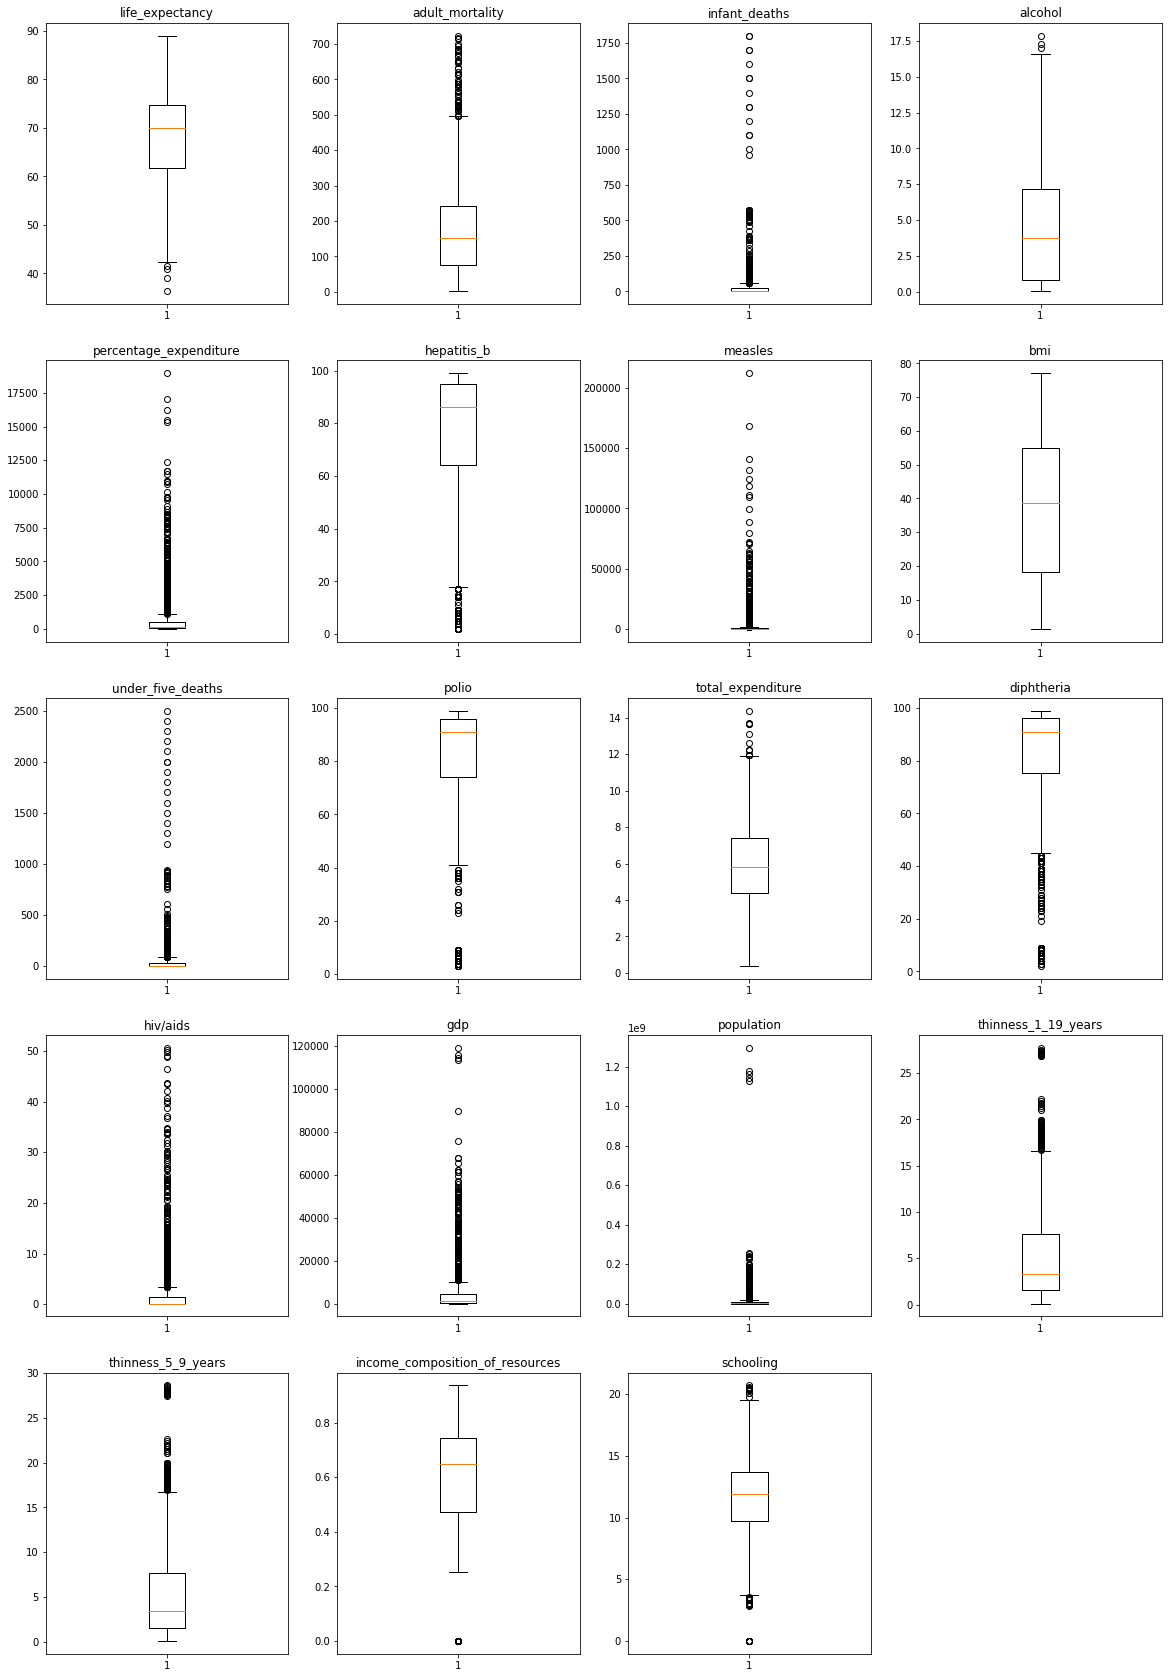

In [236]:
# display boxplots of numerical variabdfs for outlier inspection.

# Create dictionary of column names and indices as iterabdf for box-plot display.
col_dict = {'life_expectancy':1, 'adult_mortality':2,
            'infant_deaths':3, 'alcohol':4,
            'percentage_expenditure':5, 'hepatitis_b':6,
            'measles':7, 'bmi':8,
            'under_five_deaths':9, 'polio':10,
            'total_expenditure':11,'diphtheria':12,
            'hiv/aids':13, 'gdp':14,
            'population':15, 'thinness_1_19_years':16,
            'thinness_5_9_years':17, 'income_composition_of_resources':18,
            'schooling':19}

# Display boxplots for numerical variabdfs for outlier summary.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)



In [242]:
# Calculate number of outliers in each variabdf and their percentage using Tukey's method.

for variable in col_dict.keys():
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers, percentage in column '{}' : {} and {}".format(variable,
                                                                             len((np.where((df[variable] > max_val) | 
                                                                                           (df[variable] < min_val))[0])),len((np.where((df[variable] > max_val) | 
                                                                                           (df[variable] < min_val))[0]))*100/1987))

Number of outliers, percentage in column 'life_expectancy' : 4 and 0.20130850528434827
Number of outliers, percentage in column 'adult_mortality' : 58 and 2.9189733266230498
Number of outliers, percentage in column 'infant_deaths' : 198 and 9.96477101157524
Number of outliers, percentage in column 'alcohol' : 3 and 0.1509813789632612
Number of outliers, percentage in column 'percentage_expenditure' : 232 and 11.675893306492199
Number of outliers, percentage in column 'hepatitis_b' : 216 and 10.870659285354806
Number of outliers, percentage in column 'measles' : 361 and 18.16809260191243
Number of outliers, percentage in column 'bmi' : 0 and 0.0
Number of outliers, percentage in column 'under_five_deaths' : 227 and 11.424257674886764
Number of outliers, percentage in column 'polio' : 159 and 8.002013085052843
Number of outliers, percentage in column 'total_expenditure' : 13 and 0.6542526421741318
Number of outliers, percentage in column 'diphtheria' : 195 and 9.813789632611979
Number of

In [251]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [254]:
# try a baseline model without outlier analysis and feature engineering.

from statsmodels.formula.api import ols

lr_bl0_model = ols(formula='life_expectancy~adult_mortality+infant_deaths+alcohol+percentage_expenditure+hepatitis_b\
+measles+bmi+under_five_deaths+polio+total_expenditure+diphtheria+hiv_aids+gdp+population+\
thinness_1_19_years+thinness_5_9_years+income_composition_of_resources+schooling', data=df).fit()

In [256]:
lr_bl0_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     545.8
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:22:48   Log-Likelihood:                -5556.1
No. Observations:                1987   AIC:                         1.115e+04
Df Residuals:                    1968   BIC:                         1.126e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          51.7423      0.620     83.483      0.000      50.527      52.958
adult_mortality                    -0.0154      0.001    -17.480      0.000      -0.017      -0.014
infant_deaths                       0.0897      0.009     10.078      0.000       0.072       0.107
alcohol                            -0.0793      0.031     -2.583      0.010      -0.139      -0.019
percentage_expenditure              0.0004      0.000      1.860      0.063   -1.93e-05       0.001
hepatitis_b                        -0.0030      0.004     -0.789      0.430      -0.011       0.004
measles                         -4.445e-06   8.79e-06     -0.506      0.613   -2.17e-05    1.28e-05
bmi                                 0.0584      0.006      9.254      0.000       0.046       0.071
under_five_deaths                  -0.0664      0.007    -10.185      0.000      -0.079      -0.054
polio                               0.0128      0.005      2.476      0.013       0.003       0.023
total_expenditure                   0.0729      0.042      1.741      0.082      -0.009       0.155
diphtheria                          0.0211      0.006      3.757      0.000       0.010       0.032
hiv_aids                           -0.4746      0.018    -26.384      0.000      -0.510      -0.439
gdp                               1.92e-05      3e-05      0.640      0.522   -3.97e-05    7.81e-05
population                      -1.776e-09    1.7e-09     -1.044      0.297   -5.11e-09    1.56e-09
thinness_1_19_years                -0.0512      0.051     -0.997      0.319      -0.152       0.049
thinness_5_9_years                  0.0101      0.051      0.200      0.842      -0.089       0.109
income_composition_of_resources     8.2810      0.778     10.646      0.000       6.755       9.807
schooling                           0.8869      0.054     16.355      0.000       0.781       0.993
==============================================================================
Omnibus:                      124.494   Durbin-Watson:                   0.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.455
Skew:                          -0.063   Prob(JB):                    3.24e-117
Kurtosis:                       5.542   Cond. No.                     5.85e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [258]:
#remove adult mortality due to likely high multicollinearity
lr_bl1_model = ols(formula='life_expectancy~infant_deaths+alcohol+percentage_expenditure+hepatitis_b\
+measles+bmi+under_five_deaths+polio+total_expenditure+diphtheria+hiv_aids+gdp+population+\
thinness_1_19_years+thinness_5_9_years+income_composition_of_resources+schooling', data=df).fit()

In [260]:
lr_bl1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     484.9
Date:                Thu, 30 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:23:51   Log-Likelihood:                -5699.5
No. Observations:                1987   AIC:                         1.144e+04
Df Residuals:                    1969   BIC:                         1.154e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          47.3110      0.608     77.847      0.000      46.119      48.503
infant_deaths                       0.0987      0.010     10.339      0.000       0.080       0.117
alcohol                            -0.1156      0.033     -3.515      0.000      -0.180      -0.051
percentage_expenditure              0.0004      0.000      2.146      0.032     3.8e-05       0.001
hepatitis_b                        -0.0054      0.004     -1.312      0.190      -0.013       0.003
measles                          1.007e-05   9.41e-06      1.071      0.284   -8.38e-06    2.85e-05
bmi                                 0.0691      0.007     10.251      0.000       0.056       0.082
under_five_deaths                  -0.0729      0.007    -10.420      0.000      -0.087      -0.059
polio                               0.0147      0.006      2.652      0.008       0.004       0.026
total_expenditure                   0.0932      0.045      2.073      0.038       0.005       0.181
diphtheria                          0.0207      0.006      3.434      0.001       0.009       0.033
hiv_aids                           -0.6211      0.017    -36.325      0.000      -0.655      -0.588
gdp                              1.827e-05   3.23e-05      0.566      0.571    -4.5e-05    8.15e-05
population                      -2.019e-09   1.83e-09     -1.105      0.269    -5.6e-09    1.56e-09
thinness_1_19_years                -0.0393      0.055     -0.713      0.476      -0.147       0.069
thinness_5_9_years                 -0.0234      0.054     -0.430      0.667      -0.130       0.083
income_composition_of_resources     9.4511      0.833     11.349      0.000       7.818      11.084
schooling                           0.9795      0.058     16.891      0.000       0.866       1.093
==============================================================================
Omnibus:                      133.883   Durbin-Watson:                   0.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.011
Skew:                          -0.017   Prob(JB):                    9.50e-138
Kurtosis:                       5.761   Cond. No.                     5.79e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

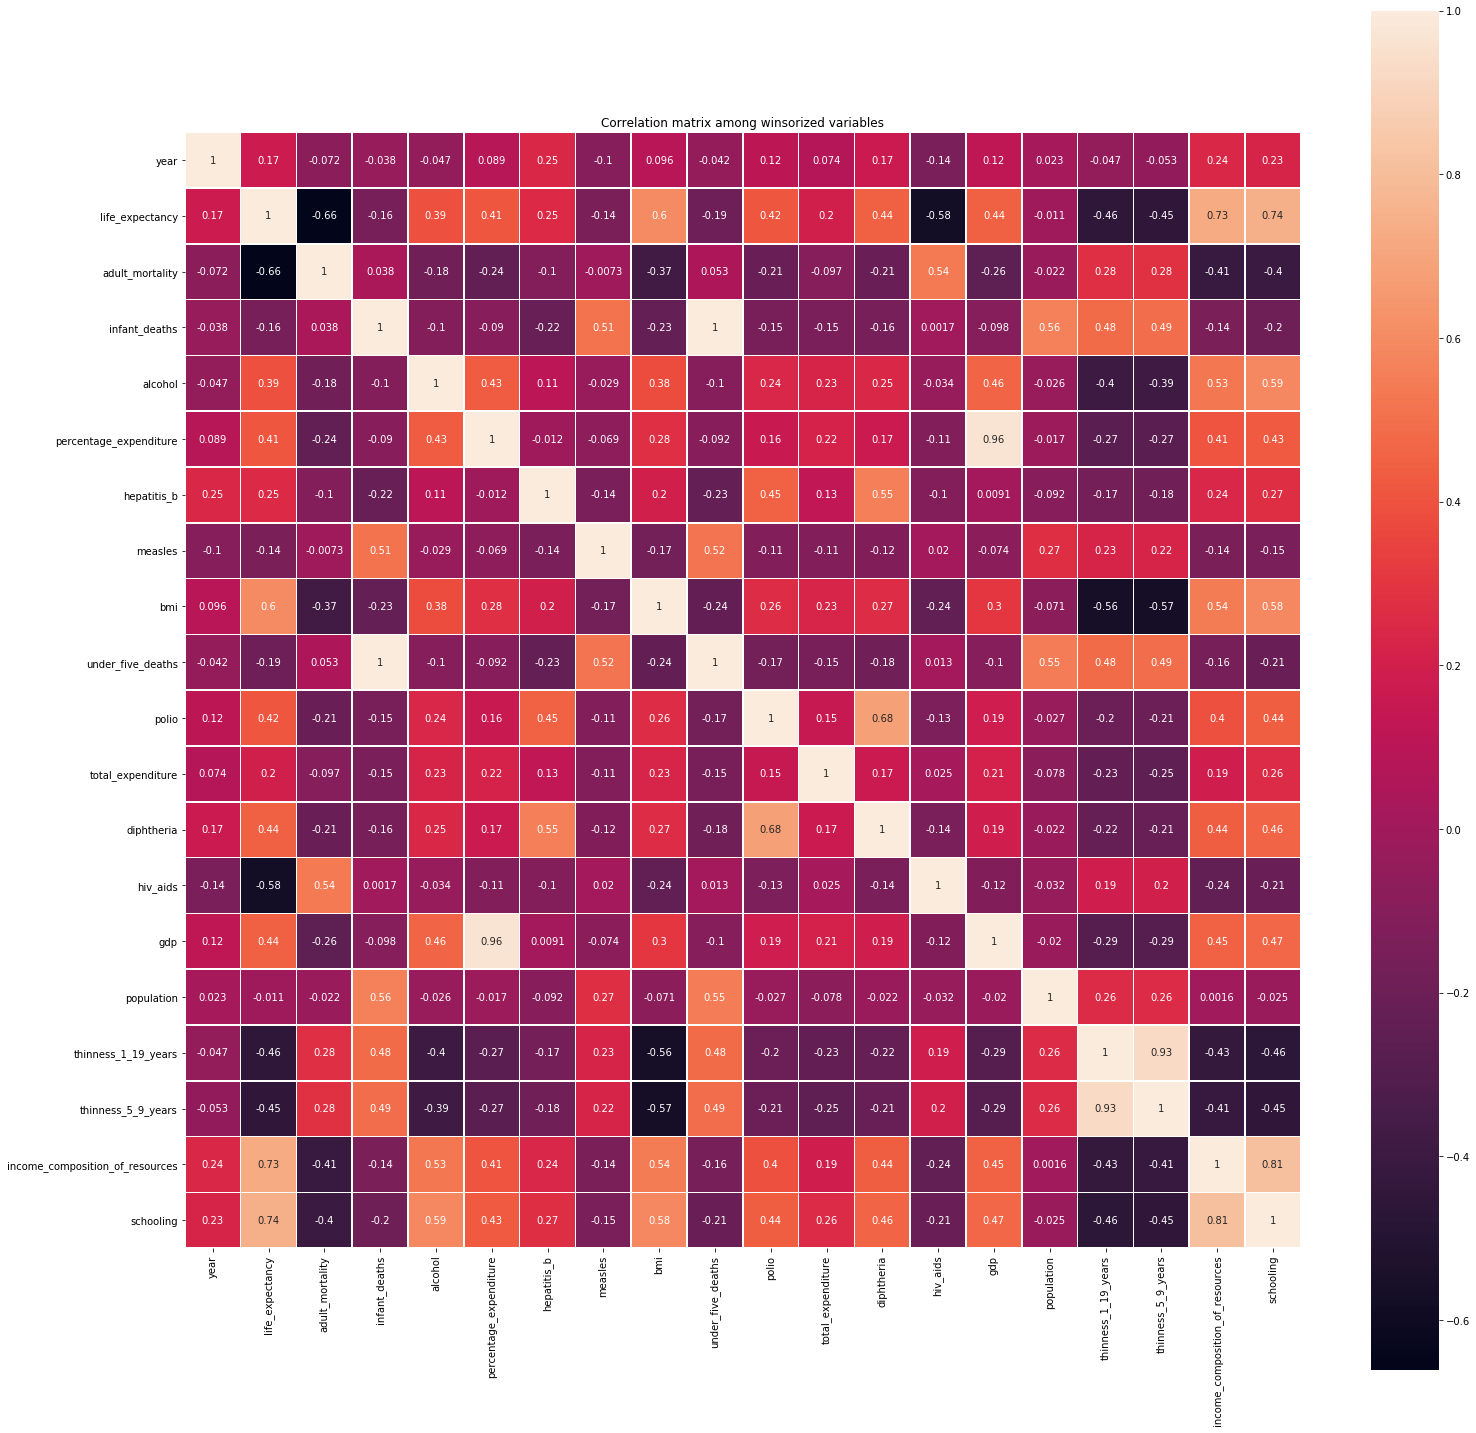

In [261]:
# Lets look at corr's for to identify multicollinearity:

corrmat = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corrmat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

KeyError: 'Life_Expectancy'

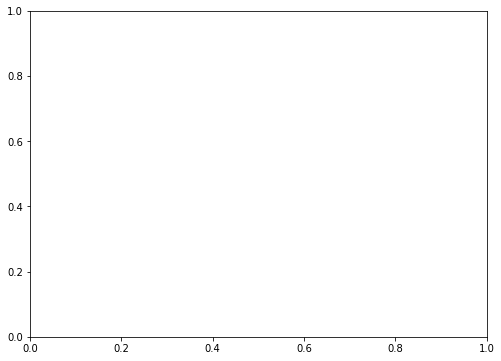

In [123]:
from scipy.stats.mstats import winsorize

winsorized_Life_Expectancy = winsorize(df['life_expectancy'],(0.01,0))
winsorized_Adult_Mortality = winsorize(df['adult_mortality'],(0,0.03))
winsorized_Infant_Deaths = winsorize(df['infant_deaths'],(0,0.10))
winsorized_Alcohol = winsorize(df['alcohol'],(0,0.01))
winsorized_Percentage_Exp = winsorize(df['percentage_expenditure'],(0,0.12))
winsorized_HepatitisB = winsorize(df['hepatitis_b'],(0.11,0))
winsorized_Measdfs = winsorize(df['measles'],(0,0.19))

In [ ]:
df = df.drop('Measdfs',axis=1)

In [ ]:
winsorized_Under_Five_Deaths = winsorize(df['under_five_deaths'],(0,0.12))
winsorized_Polio = winsorize(df['polio'],(0.09,0))
winsorized_Tot_Exp = winsorize(df['total_expenditure'],(0,0.01))
winsorized_Diphtheria = winsorize(df['Diphtheria'],(0.10,0))
winsorized_HIV = winsorize(df['hiv/aods'],(0,0.16))
winsorized_GDP = winsorize(df['gdp'],(0,0.13))
winsorized_Population = winsorize(df['population'],(0,0.14))
winsorized_thinness_1to19_years = winsorize(df['thinness_1_19_years'],(0,0.04))
winsorized_thinness_5to9_years = winsorize(df['thinness_5_9_years'],(0,0.04))
winsorized_Income_Comp_Of_Resources = winsorize(df['income_composition_of_resources'],(0.05,0))
winsorized_Schooling = winsorize(df['schooling'],(0.02,0.01))

Text(60, 500, '$Mo$$ = $73')

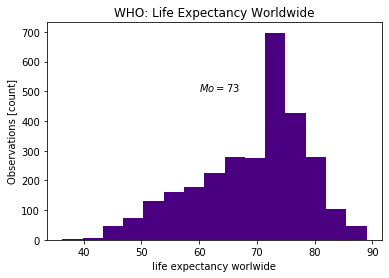

In [121]:
fig, ax =plt.subplots()

ax.hist(df.life_expectancy,color = 'indigo', bins=15)

ax.set_xlabel('life expectancy worlwide')
ax.set_ylabel('Observations [count]')
ax.set_titdf('WHO: Life Expectancy Worldwide')
plt.text(60,500, '$Mo$'+ '$ = $' + str(round(int(df.life_expectancy.mode()),2)))

In [124]:
feat = list(df.columns)
feat

['country',
 'year',
 'status',
 'life_expectancy',
 'adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under_five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv/aids',
 'gdp',
 'population',
 'thinness_1_19_years',
 'thinness_5_9_years',
 'income_composition_of_resources',
 'schooling']

In [130]:
feat

['adult_mortality',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'measles',
 'bmi',
 'under_five_deaths',
 'polio',
 'total_expenditure',
 'diphtheria',
 'hiv/aids',
 'gdp',
 'population',
 'thinness_1_19_years',
 'thinness_5_9_years',
 'income_composition_of_resources',
 'schooling']

In [131]:
n = 4
row_groups= [feat[i:i+n] for i in range(0, dfn(feat), n) ]
row_groups

[['adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure'],
 ['hepatitis_b', 'measles', 'bmi', 'under_five_deaths'],
 ['polio', 'total_expenditure', 'diphtheria', 'hiv/aids'],
 ['gdp', 'population', 'thinness_1_19_years', 'thinness_5_9_years'],
 ['income_composition_of_resources', 'schooling']]

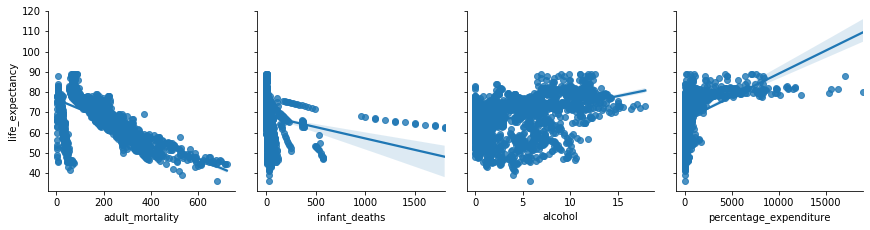

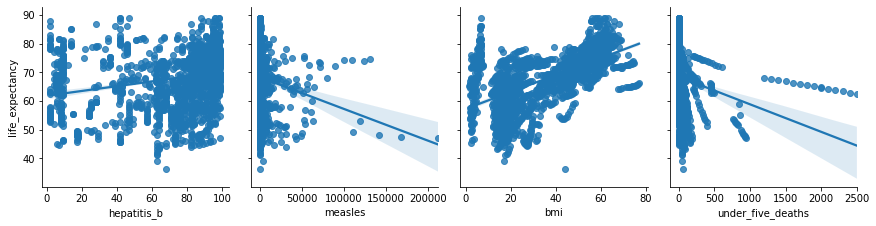

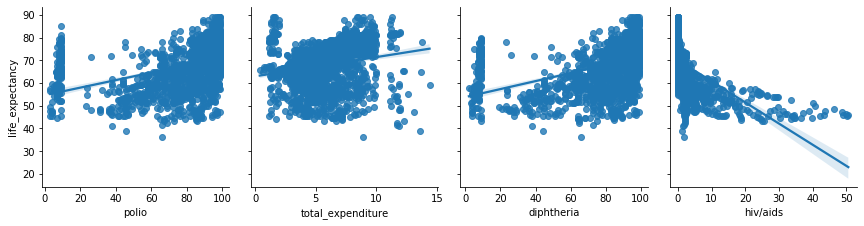

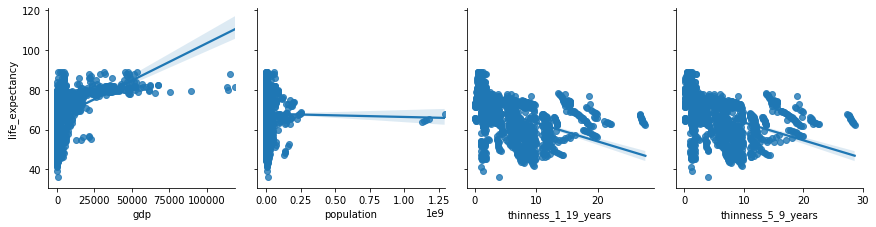

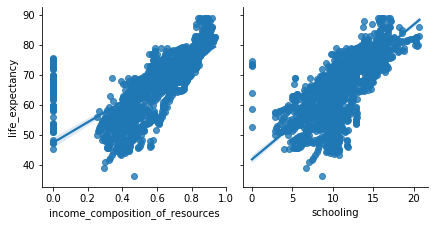

In [132]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['life_expectancy'],x_vars=i, kind="reg", height=3)